In [1]:
import pandas as pd
import seaborn as sns
import numpy
from scipy.stats import zscore

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
microdados = pd.read_csv('cotas/enade_merge_08-11-14-17.csv',sep=',',decimal='.')

In [4]:
microdados

,ano,curso,nome_curso,uf,regiao,codigo_IES,categoria_adm_IES,organizacao_academica,turno,ead_presencial,...,cotas,recebeu_cota,bolsa_academica,recebeu_bolsa,trabalha,livros_ano,horas_estudo,idade_comeco_graduacao,tempo_ocioso,tempo_cursado
0,2008,56172,SI,BA,NE,385,IES privada,Universidade,Noturno,Não-Informado,...,Não,Não,Nenhum,Não,Sim,8+,<3,18,1,6
1,2008,8913,SI,RS,S,426,IES privada,Centro Universitário,Noturno,Não-Informado,...,Não,Não,Nenhum,Não,Sim,1/2,3-8,20,4,4
2,2008,10978,SI,RS,S,532,IES privada,Universidade,Noturno,Não-Informado,...,Não,Não,Nenhum,Não,Sim,3-5,3-8,25,6,2
3,2008,20469,SI,PR,S,197,IES privada,Faculdade,Noturno,Não-Informado,...,Renda ou EM público,Sim,Nenhum,Não,Sim,1/2,3-8,21,5,3
4,2008,47985,ADS,SP,SE,1743,IES privada,Faculdade,Noturno,Não-Informado,...,Não,Não,Nenhum,Não,Sim,6-8,8+,18,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132577,2017,5001211,ADS,SC,S,3295,IES privada,Faculdade,Diurno,Presencial,...,Não,Não,Nenhum,Não,Não,0,<3,18,1,2
132578,2017,5001211,ADS,SC,S,3295,IES privada,Faculdade,Diurno,Presencial,...,Renda,Sim,Nenhum,Não,Não,8+,<3,23,5,2
132579,2017,5001211,ADS,SC,S,3295,IES privada,Faculdade,Diurno,Presencial,...,Não,Não,Nenhum,Não,Não,3-5,8+,34,9,1
132580,2017,5001284,LCC,SC,S,494,IES privada,Universidade,Integral,EAD,...,Não,Não,Nenhum,Não,Não,3-5,3-8,23,6,2


In [5]:
microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132582 entries, 0 to 132581
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ano                             132582 non-null  int64  
 1   curso                           132582 non-null  int64  
 2   nome_curso                      132582 non-null  object 
 3   uf                              132582 non-null  object 
 4   regiao                          132582 non-null  object 
 5   codigo_IES                      132582 non-null  int64  
 6   categoria_adm_IES               132582 non-null  object 
 7   organizacao_academica           132582 non-null  object 
 8   turno                           132582 non-null  object 
 9   ead_presencial                  132582 non-null  object 
 10  nota_geral                      132582 non-null  float64
 11  nota_formacao_geral             132582 non-null  float64
 12  nota_obj_formaca

In [6]:
colunasDataset = list(microdados.columns)

In [7]:
colunasDataset.remove('ano')
colunasDataset.remove('curso')
colunasDataset.remove('nome_curso')
colunasDataset.remove('formatura_ensino_medio')
colunasDataset.remove('inicio_graduacao')
colunasDataset.remove('idade')

In [8]:
microdados['ano'].value_counts()

2014    40783
2017    40114
2011    33219
2008    18466
Name: ano, dtype: int64

In [9]:
microdados.nome_curso.value_counts()

SI     42977
ADS    31863
BCC    30788
RC     11925
EC      8274
LCC     3552
GTI     3203
Name: nome_curso, dtype: int64

In [10]:
alunos2008 = microdados.loc[microdados.ano == 2008]
alunos2008.groupby(['nome_curso']).curso.nunique()

nome_curso
ADS    219
BCC    253
EC      22
RC     120
SI     407
Name: curso, dtype: int64

In [11]:
alunos2008.groupby(['nome_curso']).categoria_adm_IES.value_counts()

nome_curso  categoria_adm_IES
ADS         IES privada          3111
            IES pública           741
BCC         IES privada          2895
            IES pública          1552
EC          IES privada           288
            IES pública            99
RC          IES privada          1941
            IES pública           238
SI          IES privada          6882
            IES pública           719
Name: categoria_adm_IES, dtype: int64

In [12]:
alunos2011 = microdados.loc[microdados.ano == 2011]
alunos2011.groupby(['nome_curso']).curso.nunique()

nome_curso
ADS    259
BCC    386
EC      77
LCC     39
RC     167
SI     356
Name: curso, dtype: int64

In [13]:
alunos2011.groupby(['nome_curso']).categoria_adm_IES.value_counts()

nome_curso  categoria_adm_IES
ADS         IES privada          5382
            IES pública          1883
BCC         IES privada          6551
            IES pública          3119
EC          IES privada          1383
            IES pública           546
LCC         IES pública           448
            IES privada           246
RC          IES privada          3064
            IES pública           351
SI          IES privada          9163
            IES pública          1083
Name: categoria_adm_IES, dtype: int64

In [14]:
alunos2014 = microdados.loc[microdados.ano == 2014]
alunos2014.groupby(['nome_curso']).curso.nunique()

nome_curso
ADS    352
BCC    304
EC     119
LCC     54
RC     197
SI     479
Name: curso, dtype: int64

In [15]:
alunos2014.groupby(['nome_curso']).categoria_adm_IES.value_counts()

nome_curso  categoria_adm_IES
ADS         IES privada           7568
            IES pública           3542
BCC         IES privada           5094
            IES pública           3169
EC          IES privada           1501
            IES pública           1042
LCC         IES pública           1407
            IES privada            371
RC          IES privada           3384
            IES pública            467
SI          IES privada          11113
            IES pública           2125
Name: categoria_adm_IES, dtype: int64

In [16]:
alunos2017 = microdados.loc[microdados.ano == 2017]
alunos2017.groupby(['nome_curso']).curso.nunique()

nome_curso
ADS    367
BCC    308
EC     144
GTI    118
LCC     55
RC     158
SI     453
Name: curso, dtype: int64

In [17]:
alunos2017.groupby(['nome_curso']).categoria_adm_IES.value_counts()

nome_curso  categoria_adm_IES
ADS         IES privada          5773
            IES pública          3863
BCC         IES privada          4597
            IES pública          3811
EC          IES privada          1773
            IES pública          1642
GTI         IES privada          2679
            IES pública           524
LCC         IES pública           895
            IES privada           185
RC          IES privada          2035
            IES pública           445
SI          IES privada          8788
            IES pública          3104
Name: categoria_adm_IES, dtype: int64

In [18]:
def ListColumnValues(coluna):
    return sorted(list(microdados[coluna].unique()))

In [19]:
def plot3D(colunaX, colunaY,y_label, x_label, x_order, hue_order, file, bbox_x,bbox_y,loc,labels=None,tick_label_dict=None,y_lim_min=None,y_lim_max=None, list_max=None, list_step=None):
    plot = sns.countplot(x=colunaX, hue=colunaY, data=microdados, hue_order=hue_order, order=x_order)
    
    plot.legend(bbox_to_anchor=(bbox_x,bbox_y), loc=loc, framealpha=0.9, facecolor='lightgray')
    
    if labels != None:
        plot.legend(bbox_to_anchor=(bbox_x,bbox_y), loc=loc, framealpha=0.9, facecolor='lightgray',labels=labels)
            
    if list_max != None and list_step != None:
        plot.set_yticks([i for i in range(0,list_max,list_step)])
    
        if list_step >= 1000:
            plot.set_yticklabels(['0']+[f'{x/1000:.0f}K' for x in list(plot.get_yticks()[1:])])
    
    if tick_label_dict!=None:
        plot.set_xticklabels(tick_label_dict.values())
    
    plot.set_xlabel(x_label)
    
    if y_lim_min != y_lim_max and y_lim_min !=None and y_lim_max !=None:
        plot.set_ylim(y_lim_min,y_lim_max)
    
    plot.set_ylabel(y_label)
    

    plot.get_figure().savefig('./imagensTCC/{}.png'.format(file),dpi=600, bbox_inches='tight')

In [20]:
def plot3Dmedia(colunaX, colunaY,y_label, x_label, file, list_max=None, list_step=None):
    plot = sns.barplot(x=colunaX, y=colunaY, data=microdados, estimator=numpy.median, ci=None)
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    
    if list_max != None and list_step != None:
        plot.set_yticks([i for i in range(0,list_max,list_step)])
    
    plot.get_figure().savefig('./imagensTCC/{}.png'.format(file),dpi=600, bbox_inches='tight')

In [21]:
flierprops = dict(marker='o', markerfacecolor='gainsboro', markersize=4,
                  markeredgecolor='black')
meanlineprops = dict(linestyle='dashed', linewidth=1.5, color='red')
whiskerprops = dict(linewidth=1.5, color='black')
capprops = dict(linewidth=1.5, color='black')
boxplotprops = dict(linewidth=1.5, linestyle='solid')
medianprops = dict(color='darkgray', linewidth=1.5)

In [22]:
def boxplotNota(colunaX, colunaY,y_label, x_label, file, x_order, list_max=None, list_step=None):
    plot = sns.boxplot(x=colunaX, y=colunaY, data=microdados, order=x_order, meanline=True, showmeans = True,meanprops = meanlineprops, flierprops=flierprops, whiskerprops=whiskerprops,
                       capprops=capprops, boxprops=boxplotprops, medianprops=medianprops, saturation=1.0)
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    
    if list_max != None and list_step != None:
        plot.set_yticks([i for i in range(0,list_max,list_step)])
    
    plot.get_figure().savefig('./imagensTCC/{}.png'.format(file),dpi=600, bbox_inches='tight')

In [23]:
lista_cursos = ListColumnValues('nome_curso')
lista_cursos

['ADS', 'BCC', 'EC', 'GTI', 'LCC', 'RC', 'SI']

## Alunos por região e curso

In [24]:
lista_regioes = ListColumnValues('regiao')
lista_regioes

['CO', 'N', 'NE', 'S', 'SE']

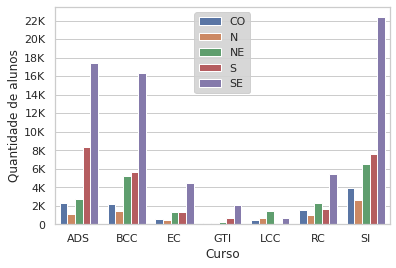

In [25]:
plot3D('nome_curso','regiao', 'Quantidade de alunos','Curso',lista_cursos, lista_regioes, 'alunos_regiao', 0.5,1, 'upper center', list_max=23000, list_step=2000)

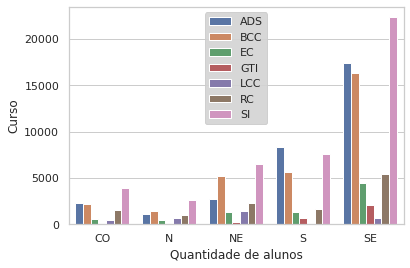

In [26]:
plot3D('regiao','nome_curso', 'Curso','Quantidade de alunos' ,lista_regioes,lista_cursos, 'alunos_regiao_2', 0.5,1, 'upper center')


In [27]:
microdados.groupby('regiao').nome_curso.value_counts().unstack()

nome_curso,ADS,BCC,EC,GTI,LCC,RC,SI
regiao,,,,,,,
CO,2303,2213,598,122,516,1548,3946
N,1157,1404,461,67,692,997,2623
NE,2706,5209,1381,225,1443,2313,6513
S,8298,5670,1337,720,176,1641,7537
SE,17399,16292,4497,2069,725,5426,22358


In [28]:
microdados.groupby('regiao').curso.nunique()


regiao
CO     243
N      150
NE     332
S      431
SE    1147
Name: curso, dtype: int64

In [29]:
microdados.groupby('regiao').codigo_IES.nunique()

regiao
CO    100
N      74
NE    166
S     196
SE    476
Name: codigo_IES, dtype: int64

In [30]:
microdados.regiao.value_counts()

SE    68766
S     25379
NE    19790
CO    11246
N      7401
Name: regiao, dtype: int64

In [31]:
colunasDataset.remove('regiao')

In [32]:
colunasDataset.remove('uf')

## Alunos por IES e curso

In [33]:
microdados['curso'].nunique()

2303

In [34]:
microdados.groupby('categoria_adm_IES').curso.nunique()

categoria_adm_IES
IES privada    1733
IES pública     598
Name: curso, dtype: int64

In [35]:
microdados['codigo_IES'].nunique()

1008

In [36]:
microdados.groupby('categoria_adm_IES').codigo_IES.nunique()

categoria_adm_IES
IES privada    817
IES pública    201
Name: codigo_IES, dtype: int64

In [37]:
lista_ies = ListColumnValues('categoria_adm_IES')

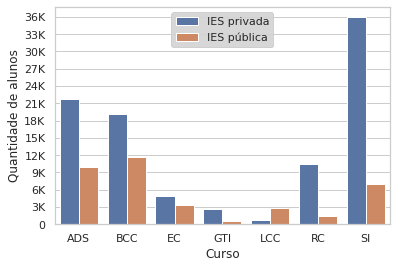

In [38]:
plot3D('nome_curso','categoria_adm_IES', 'Quantidade de alunos','Curso',lista_cursos, lista_ies, 'alunos_IES', 0.5,1, 'upper center', list_max=37000, list_step=3000)

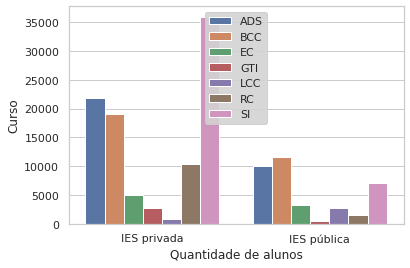

In [39]:
plot3D('categoria_adm_IES','nome_curso', 'Curso','Quantidade de alunos', lista_ies,lista_cursos, 'alunos_IES_2', 0.5,1, 'upper center')


In [40]:
microdados.categoria_adm_IES.value_counts()

IES privada    95767
IES pública    36815
Name: categoria_adm_IES, dtype: int64

In [41]:
colunasDataset.remove('categoria_adm_IES')

In [42]:
colunasDataset.remove('codigo_IES')

In [43]:
colunasDataset.remove('organizacao_academica')

## Alunos por turno

In [44]:
lista_turno = ListColumnValues('turno')

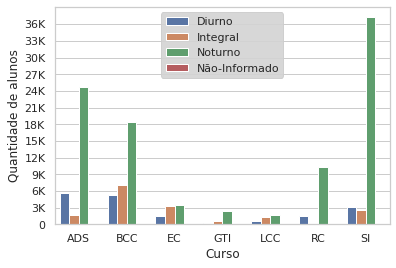

In [45]:
plot3D('nome_curso','turno', 'Quantidade de alunos','Curso',lista_cursos, lista_turno, 'alunos_turno', 0.5,1, 'upper center', list_max=37000, list_step=3000)

In [46]:
microdados.curso.nunique()


2303

In [47]:
microdados.groupby(['turno']).curso.nunique()
# talvez um curso mudou de turno ao longo dos anos

turno
Diurno            617
Integral          337
Noturno          1985
Não-Informado      28
Name: curso, dtype: int64

In [48]:
microdados.groupby(['turno','categoria_adm_IES']).curso.nunique().unstack()

categoria_adm_IES,IES privada,IES pública
turno,,
Diurno,379,243
Integral,117,221
Noturno,1663,347
Não-Informado,25,3


In [49]:
microdados.turno.value_counts()

Noturno          98102
Diurno           17936
Integral         16484
Não-Informado       60
Name: turno, dtype: int64

In [50]:
colunasDataset.remove('turno')

## Alunos por modalidade

In [51]:
lista_modalidade = ListColumnValues('ead_presencial')

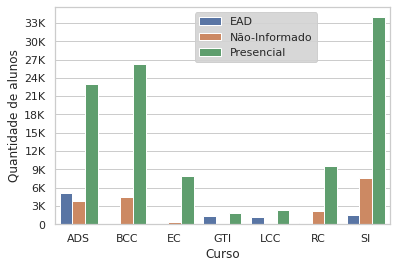

In [52]:
plot3D('nome_curso','ead_presencial', 'Quantidade de alunos','Curso',lista_cursos, lista_modalidade, 'alunos_modalidade', 0.6,1, 'upper center', list_max=35000, list_step=3000)

In [53]:
microdados.ead_presencial.value_counts()

Presencial       104788
Não-Informado     18466
EAD                9328
Name: ead_presencial, dtype: int64

In [54]:
# microdados.groupby('ead_presencial').categoria_adm_IES.value_counts()
microdados.groupby(['ead_presencial','categoria_adm_IES']).curso.nunique()


ead_presencial  categoria_adm_IES
EAD             IES privada            57
                IES pública            21
Não-Informado   IES privada           849
                IES pública           172
Presencial      IES privada          1504
                IES pública           546
Name: curso, dtype: int64

In [55]:
microdados.groupby(['ead_presencial','turno']).curso.nunique()


ead_presencial  turno        
EAD             Diurno             18
                Integral           41
                Noturno            43
Não-Informado   Diurno            206
                Integral           78
                Noturno           900
                Não-Informado      28
Presencial      Diurno            528
                Integral          270
                Noturno          1753
Name: curso, dtype: int64

In [56]:
microdados.groupby('ead_presencial').curso.nunique()

ead_presencial
EAD                78
Não-Informado    1021
Presencial       2033
Name: curso, dtype: int64

In [57]:
colunasDataset.remove('ead_presencial')

##  Alunos por EM

In [58]:
lista_EM = ListColumnValues('tipo_ensino_medio')

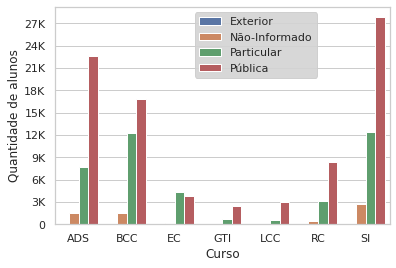

In [59]:
plot3D('nome_curso','tipo_ensino_medio', 'Quantidade de alunos','Curso',lista_cursos, lista_EM, 'alunos_EM', 0.6,1, 'upper center', list_max=28000, list_step=3000)

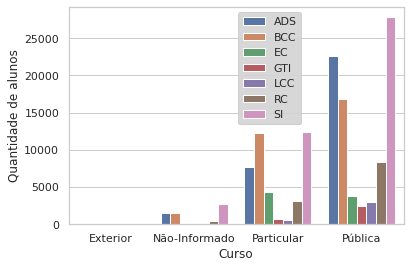

In [60]:
# plot3D('nome_curso', 'tipo_ensino_medio', 'Quantidade de alunos','Curso', lista_cursos, lista_EM, 'alunos_EM2', 0.6,1, 'upper center')


In [61]:
microdados.tipo_ensino_medio.value_counts()

Pública          84799
Particular       41212
Não-Informado     6290
Exterior           281
Name: tipo_ensino_medio, dtype: int64

In [62]:
microdados.groupby('tipo_ensino_medio').categoria_adm_IES.value_counts()

tipo_ensino_medio  categoria_adm_IES
Exterior           IES privada            193
                   IES pública             88
Não-Informado      IES privada           5124
                   IES pública           1166
Particular         IES privada          27848
                   IES pública          13364
Pública            IES privada          62602
                   IES pública          22197
Name: categoria_adm_IES, dtype: int64

In [63]:
microdados.groupby('categoria_adm_IES').tipo_ensino_medio.value_counts()


categoria_adm_IES  tipo_ensino_medio
IES privada        Pública              62602
                   Particular           27848
                   Não-Informado         5124
                   Exterior               193
IES pública        Pública              22197
                   Particular           13364
                   Não-Informado         1166
                   Exterior                88
Name: tipo_ensino_medio, dtype: int64

In [64]:
colunasDataset.remove('tipo_ensino_medio')

## Alunos por idade

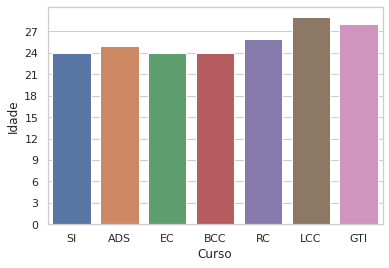

In [65]:
# idade media
plot3Dmedia('nome_curso', 'idade', 'Idade', 'Curso', 'alunos_idade_media', 30, 3)

In [66]:
microdados.idade.mode()

0    22
dtype: int64

In [67]:
microdados.idade.value_counts()

22    16484
23    14914
21    14057
24    12836
25    10659
26     8810
27     7110
20     6301
28     6214
29     5095
30     4215
31     3700
32     3027
33     2597
34     2311
35     1920
36     1745
19     1428
37     1356
38     1175
39      967
40      875
41      710
42      668
43      501
44      433
45      430
46      326
47      284
48      226
49      217
50      176
18      140
51      139
52      112
53       84
54       69
55       66
56       40
58       38
57       34
59       26
60       19
61       11
17        8
64        7
62        6
66        6
63        4
77        2
65        1
67        1
69        1
73        1
Name: idade, dtype: int64

In [68]:
microdados['ano'].loc[microdados.idade == 17].value_counts()

2008    5
2017    1
2011    1
2014    1
Name: ano, dtype: int64

In [69]:
microdados.idade.mean()

26.292520855018026

In [70]:
microdados.idade.std()

5.9088689786058035

In [71]:
microdados.idade_comeco_graduacao.mode()

0    18
dtype: int64

In [72]:
microdados.idade_comeco_graduacao.mean()

22.739557405982712

In [73]:
microdados.tempo_ocioso.mode()

0    1
dtype: int64

In [74]:
microdados.tempo_ocioso.mean()

4.526149854429711

In [75]:
lista_idade = ListColumnValues('range_idade')

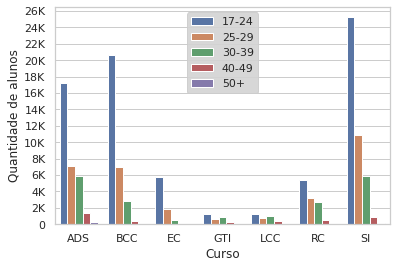

In [76]:
plot3D('nome_curso','range_idade', 'Quantidade de alunos','Curso',lista_cursos, lista_idade, 'alunos_idade', 0.5,1, 'upper center', list_max=27000, list_step=2000)

In [77]:
colunasDataset.remove('range_idade')

## Alunos por sexo

In [78]:
lista_sexo = ListColumnValues('sexo')
sexos = ['Feminino', 'Masculino']

In [79]:
microdados.sexo.value_counts()

M    111927
F     20655
Name: sexo, dtype: int64

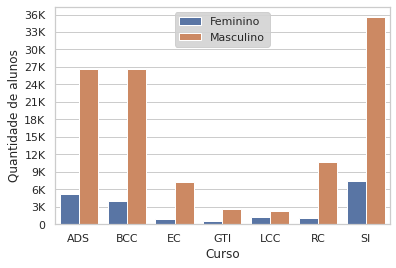

In [80]:
plot3D('nome_curso','sexo', 'Quantidade de alunos','Curso',lista_cursos, lista_sexo, 'alunos_sexo', 0.5,1, 'upper center', labels=sexos,list_max=37000, list_step=3000)

In [81]:
colunasDataset.remove('sexo')

## Alunos por cor

In [82]:
lista_cor = ListColumnValues('cor_raca')

In [83]:
microdados.cor_raca.value_counts()

Branca      77064
Parda       34888
Preta        9120
Não Inf.     7512
Amarela      3264
Indígena      734
Name: cor_raca, dtype: int64

In [84]:
microdados.cor_raca.value_counts(normalize=True)


Branca      0.581255
Parda       0.263143
Preta       0.068788
Não Inf.    0.056659
Amarela     0.024619
Indígena    0.005536
Name: cor_raca, dtype: float64

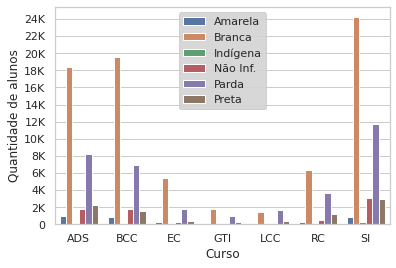

In [85]:
plot3D('nome_curso','cor_raca', 'Quantidade de alunos','Curso',lista_cursos, lista_cor, 'alunos_cor', 0.5,1, 'upper center',list_max=25000, list_step=2000)

In [86]:
colunasDataset.remove('cor_raca')

## Alunos por escolaridade pai

In [87]:
lista_escola_pai = ListColumnValues('escolaridade_pai')

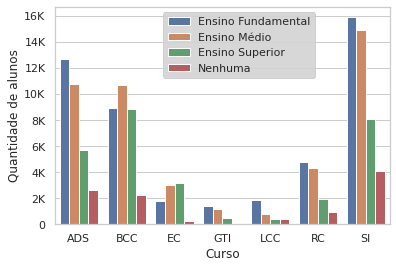

In [88]:
plot3D('nome_curso','escolaridade_pai', 'Quantidade de alunos','Curso',lista_cursos, lista_escola_pai, 'alunos_escola_pai', 0.55,1, 'upper center',list_max=17000, list_step=2000)

In [89]:
microdados.escolaridade_pai.mode()

0    Ensino Fundamental
dtype: object

In [90]:
microdados.escolaridade_pai.value_counts()

Ensino Fundamental    47403
Ensino Médio          45744
Ensino Superior       28713
Nenhuma               10722
Name: escolaridade_pai, dtype: int64

In [91]:
microdados.groupby('escolaridade_pai').idade_comeco_graduacao.apply(lambda x: x.mean())

escolaridade_pai
Ensino Fundamental    24.172626
Ensino Médio          21.935445
Ensino Superior       21.379306
Nenhuma               23.477150
Name: idade_comeco_graduacao, dtype: float64

In [92]:
microdados.groupby('escolaridade_pai').categoria_adm_IES.apply(lambda x: x.mode())


escolaridade_pai     
Ensino Fundamental  0    IES privada
Ensino Médio        0    IES privada
Ensino Superior     0    IES privada
Nenhuma             0    IES privada
Name: categoria_adm_IES, dtype: object

In [93]:
microdados.groupby('escolaridade_pai').renda_familiar.value_counts()

escolaridade_pai    renda_familiar
Ensino Fundamental  3-10              25705
                    <3                18410
                    10-30              3146
                    30+                 122
                    Nenhuma              20
Ensino Médio        3-10              27285
                    <3                12674
                    10-30              5418
                    30+                 345
                    Nenhuma              22
Ensino Superior     3-10              15223
                    10-30              7477
                    <3                 4671
                    30+                1320
                    Nenhuma              22
Nenhuma             Nenhuma            6219
                    <3                 2449
                    3-10               1862
                    10-30               173
                    30+                  19
Name: renda_familiar, dtype: int64

In [94]:
colunasDataset.remove('escolaridade_pai')

## Alunos por escolaridade mae

In [95]:
lista_escola_mae = ListColumnValues('escolaridade_mae')

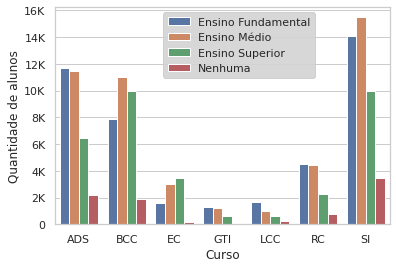

In [96]:
plot3D('nome_curso','escolaridade_mae', 'Quantidade de alunos','Curso',lista_cursos, lista_escola_mae, 'alunos_escola_mae', 0.55,1, 'upper center',list_max=17000, list_step=2000)

In [97]:
microdados.escolaridade_mae.value_counts()

Ensino Médio          47622
Ensino Fundamental    42649
Ensino Superior       33429
Nenhuma                8882
Name: escolaridade_mae, dtype: int64

In [98]:
colunasDataset.remove('escolaridade_mae')

## Alunos por renda

In [99]:
lista_renda = ['Nenhuma','<3','3-10','10-30','30+']
renda_label = ['Nenhuma', 'Menos que 3', '3-10','10-30', 'Mais que 30']

In [100]:
microdados.renda_familiar.value_counts()

3-10       70075
<3         38204
10-30      16214
Nenhuma     6283
30+         1806
Name: renda_familiar, dtype: int64

In [101]:
microdados.renda_familiar.value_counts(normalize=True)


3-10       0.528541
<3         0.288154
10-30      0.122294
Nenhuma    0.047390
30+        0.013622
Name: renda_familiar, dtype: float64

In [102]:
microdados.groupby('renda_familiar').categoria_adm_IES.apply(lambda x: x.mode())

renda_familiar   
10-30           0    IES privada
3-10            0    IES privada
30+             0    IES privada
<3              0    IES privada
Nenhuma         0    IES privada
Name: categoria_adm_IES, dtype: object

In [103]:
microdados.groupby('renda_familiar').escolaridade_pai.apply(lambda x: x.mode())

renda_familiar   
10-30           0       Ensino Superior
3-10            0          Ensino Médio
30+             0       Ensino Superior
<3              0    Ensino Fundamental
Nenhuma         0               Nenhuma
Name: escolaridade_pai, dtype: object

In [104]:
microdados.groupby('renda_familiar').escolaridade_mae.apply(lambda x: x.mode())

renda_familiar   
10-30           0       Ensino Superior
3-10            0          Ensino Médio
30+             0       Ensino Superior
<3              0    Ensino Fundamental
Nenhuma         0               Nenhuma
Name: escolaridade_mae, dtype: object

In [105]:
microdados.groupby('renda_familiar').escolaridade_mae.value_counts()


renda_familiar  escolaridade_mae  
10-30           Ensino Superior        7447
                Ensino Médio           5692
                Ensino Fundamental     2937
                Nenhuma                 138
3-10            Ensino Médio          27097
                Ensino Fundamental    23316
                Ensino Superior       18512
                Nenhuma                1150
30+             Ensino Superior        1193
                Ensino Médio            474
                Ensino Fundamental      130
                Nenhuma                   9
<3              Ensino Fundamental    16242
                Ensino Médio          14334
                Ensino Superior        6261
                Nenhuma                1367
Nenhuma         Nenhuma                6218
                Ensino Médio             25
                Ensino Fundamental       24
                Ensino Superior          16
Name: escolaridade_mae, dtype: int64

In [106]:
microdados.groupby('renda_familiar').regiao.value_counts().unstack()

regiao,CO,N,NE,S,SE
renda_familiar,,,,,
10-30,1430,614,2102,3254,8814
3-10,5446,3382,9045,14667,37535
30+,218,84,267,301,936
<3,3654,3021,7696,6482,17351
Nenhuma,498,300,680,675,4130


In [107]:
microdados.groupby('renda_familiar').nome_curso.value_counts().unstack()

nome_curso,ADS,BCC,EC,GTI,LCC,RC,SI
renda_familiar,,,,,,,
10-30,3072.0,5009.0,1648.0,229.0,169.0,1095.0,4992.0
3-10,17075.0,16245.0,4565.0,1643.0,1475.0,6416.0,22656.0
30+,203.0,717.0,295.0,15.0,19.0,93.0,464.0
<3,10006.0,7279.0,1634.0,1316.0,1889.0,3915.0,12165.0
Nenhuma,1507.0,1538.0,132.0,NaN,NaN,406.0,2700.0


In [108]:
microdados.groupby('renda_familiar').idade.apply(lambda x: x.mode())

renda_familiar   
10-30           0    22
3-10            0    22
30+             0    22
<3              0    22
Nenhuma         0    21
Name: idade, dtype: int64

In [109]:
microdados.groupby('renda_familiar').idade.apply(lambda x: x.mean())


renda_familiar
10-30      26.347231
3-10       26.460706
30+        25.032669
<3         26.262695
Nenhuma    24.819035
Name: idade, dtype: float64

In [110]:
microdados.groupby('renda_familiar').cor_raca.value_counts().unstack()


cor_raca,Amarela,Branca,Indígena,Não Inf.,Parda,Preta
renda_familiar,,,,,,
10-30,521,11756,69,115,3137,616
3-10,1763,44489,380,659,18197,4587
30+,56,1396,14,19,268,53
<3,921,19378,270,503,13271,3861
Nenhuma,3,45,1,6216,15,3


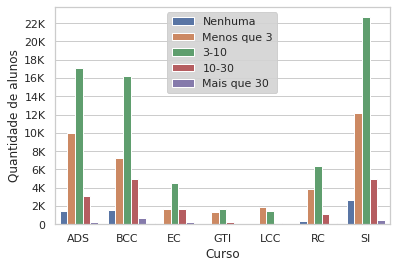

In [111]:
plot3D('nome_curso','renda_familiar', 'Quantidade de alunos','Curso',lista_cursos, lista_renda, 'alunos_renda', 0.50,1, 'upper center', labels=renda_label,list_max=23000, list_step=2000)

In [112]:
colunasDataset.remove('renda_familiar')

## Alunos por cota

In [113]:
lista_cotas = ['Não', 'EM público',  'Renda', 'Renda ou EM público', 'Étnico Racial', 'Outro', '2+']
cotas_labels = ['Não', 'EM público',  'Renda', 'Renda ou EM público', 'Étnico Racial', 'Outro tipo', '2 ou mais critérios']

In [114]:
microdados.cotas.loc[microdados.cotas != 'Não'].value_counts().sum()

21907

In [115]:
microdados.recebeu_cota.value_counts()

Não    110675
Sim     21907
Name: recebeu_cota, dtype: int64

In [116]:
microdados.groupby('recebeu_cota').categoria_adm_IES.value_counts().unstack()

categoria_adm_IES,IES privada,IES pública
recebeu_cota,,
Não,80641,30034
Sim,15126,6781


In [117]:
microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132582 entries, 0 to 132581
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ano                             132582 non-null  int64  
 1   curso                           132582 non-null  int64  
 2   nome_curso                      132582 non-null  object 
 3   uf                              132582 non-null  object 
 4   regiao                          132582 non-null  object 
 5   codigo_IES                      132582 non-null  int64  
 6   categoria_adm_IES               132582 non-null  object 
 7   organizacao_academica           132582 non-null  object 
 8   turno                           132582 non-null  object 
 9   ead_presencial                  132582 non-null  object 
 10  nota_geral                      132582 non-null  float64
 11  nota_formacao_geral             132582 non-null  float64
 12  nota_obj_formaca

In [118]:
microdados.groupby('recebeu_cota').cor_raca.value_counts()


recebeu_cota  cor_raca
Não           Branca      66035
              Parda       27261
              Não Inf.     7298
              Preta        6670
              Amarela      2802
              Indígena      609
Sim           Branca      11029
              Parda        7627
              Preta        2450
              Amarela       462
              Não Inf.      214
              Indígena      125
Name: cor_raca, dtype: int64

In [119]:
microdados.groupby('recebeu_cota').escolaridade_pai.value_counts()


recebeu_cota  escolaridade_pai  
Não           Ensino Médio          38137
              Ensino Fundamental    37097
              Ensino Superior       25831
              Nenhuma                9610
Sim           Ensino Fundamental    10306
              Ensino Médio           7607
              Ensino Superior        2882
              Nenhuma                1112
Name: escolaridade_pai, dtype: int64

In [120]:
microdados.groupby('recebeu_cota').escolaridade_mae.value_counts()

recebeu_cota  escolaridade_mae  
Não           Ensino Médio          39386
              Ensino Fundamental    33390
              Ensino Superior       29685
              Nenhuma                8214
Sim           Ensino Fundamental     9259
              Ensino Médio           8236
              Ensino Superior        3744
              Nenhuma                 668
Name: escolaridade_mae, dtype: int64

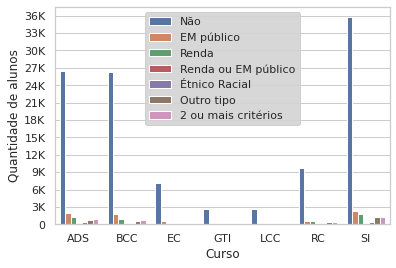

In [121]:
plot3D('nome_curso','cotas', 'Quantidade de alunos','Curso',lista_cursos, lista_cotas, 'alunos_cota', 0.5,1, 'upper center', labels=cotas_labels,list_max=37000, list_step=3000)

In [122]:
microdados['tipo_cota'] = microdados['cotas'].loc[microdados.cotas != "Não"]

In [123]:
cotas_labels.remove('Não')
lista_cotas.remove('Não')


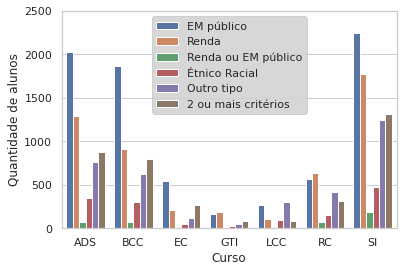

In [124]:
plot3D('nome_curso','tipo_cota', 'Quantidade de alunos','Curso',lista_cursos, lista_cotas, 'alunos_cota_tipo', 0.5,1, 'upper center', labels=cotas_labels,list_max=3000, list_step=500)


In [125]:
cotas_sn = ['Sim','Não']

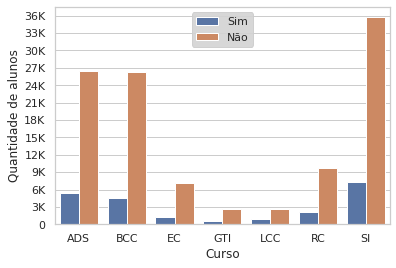

In [126]:
plot3D('nome_curso','recebeu_cota', 'Quantidade de alunos','Curso',lista_cursos, cotas_sn, 'alunos_cota_sn', 0.5,1, 'upper center', labels=cotas_sn,list_max=37000, list_step=3000)


In [127]:
colunasDataset.remove('cotas')

In [128]:
colunasDataset.remove('recebeu_cota')

## Alunos por bolsa

In [129]:
lista_bolsa = ListColumnValues('bolsa_academica')

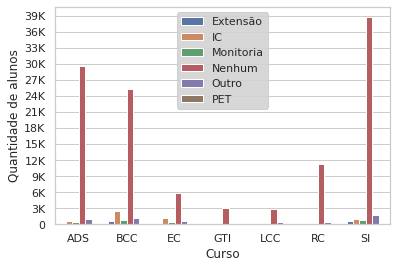

In [130]:
plot3D('nome_curso','bolsa_academica', 'Quantidade de alunos','Curso',lista_cursos, lista_bolsa, 'alunos_bolsa', 0.5,1, 'upper center', list_max=40000, list_step=3000)

In [131]:
lista_bolsa.remove('Nenhum')

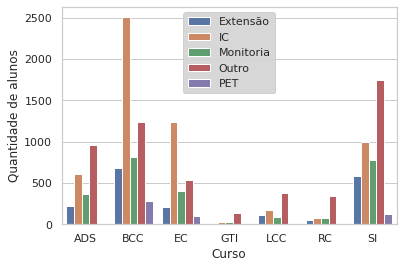

In [132]:
plot3D('nome_curso','bolsa_academica', 'Quantidade de alunos','Curso',lista_cursos, lista_bolsa, 'alunos_bolsa_tipo', 0.5,1, 'upper center', labels=lista_bolsa, list_max=3000, list_step=500)


In [133]:
bolsa_sn = ['Sim','Não']


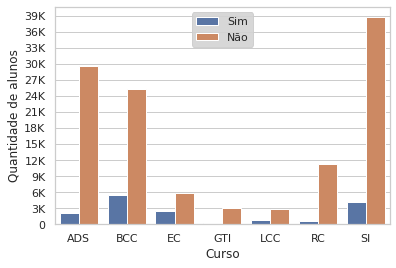

In [134]:
plot3D('nome_curso','recebeu_bolsa', 'Quantidade de alunos','Curso',lista_cursos, bolsa_sn, 'alunos_bolsa_sn', 0.5,1, 'upper center', labels=bolsa_sn,list_max=40000, list_step=3000)


In [135]:
microdados.bolsa_academica.loc[microdados.bolsa_academica != 'Nenhum'].value_counts().sum()

15973

In [136]:
microdados.loc[microdados.bolsa_academica != 'Nenhum'].groupby('bolsa_academica').categoria_adm_IES.value_counts().unstack().sum()

categoria_adm_IES
IES privada    6015
IES pública    9958
dtype: int64

In [137]:
microdados.bolsa_academica.loc[microdados.bolsa_academica != 'Nenhum'].value_counts()

IC           5623
Outro        5341
Monitoria    2568
Extensão     1890
PET           551
Name: bolsa_academica, dtype: int64

In [138]:
# x = microdados.groupby(['nome_curso','recebeu_bolsa']).tempo_cursado.mean().unstack() 
# x['diff'] = 1-(x['Sim'] / x['Não'])
# x['diff'].mean()
# x
# .agg(lambda x: x[2] - x[1])

In [139]:
microdados.groupby(['nome_curso','recebeu_bolsa']).tempo_cursado.mean().unstack()

recebeu_bolsa,Não,Sim
nome_curso,,
ADS,2.601025,2.870438
BCC,4.206396,4.506792
EC,4.789628,4.698674
GTI,2.496473,2.495575
LCC,3.610236,3.922164
RC,2.431236,2.678571
SI,3.855613,4.123965


In [136]:
colunasDataset.remove('bolsa_academica')

In [137]:
colunasDataset.remove('recebeu_bolsa')

## Alunos por trabalho

In [138]:
lista_trabalho = ListColumnValues('trabalha')
lista_trabalho

['Não', 'Não-Informado', 'Sim']

In [139]:
microdados.trabalha.value_counts(normalize=True)

Sim              0.748767
Não              0.203565
Não-Informado    0.047669
Name: trabalha, dtype: float64

In [140]:
microdados.groupby('trabalha').range_idade.value_counts().unstack()

range_idade,17-24,25-29,30-39,40-49,50+
trabalha,,,,,
Não,20064,4633,1871,337,84
Não-Informado,4261,1290,652,106,11
Sim,52502,25521,17150,3528,572


In [141]:
microdados.groupby('trabalha').categoria_adm_IES.value_counts().unstack()


categoria_adm_IES,IES privada,IES pública
trabalha,,
Não,14981,12008
Não-Informado,5144,1176
Sim,75642,23631


In [142]:
microdados.groupby('trabalha').ead_presencial.value_counts().unstack()

ead_presencial,EAD,Não-Informado,Presencial
trabalha,,,
Não,977,913,25099
Não-Informado,2,6267,51
Sim,8349,11286,79638


In [143]:
microdados.groupby('trabalha').turno.value_counts().unstack()

turno,Diurno,Integral,Noturno,Não-Informado
trabalha,,,,
Não,6345.0,6209.0,14435.0,NaN
Não-Informado,682.0,401.0,5207.0,30.0
Sim,10909.0,9874.0,78460.0,30.0


In [144]:
microdados.groupby('trabalha').renda_familiar.value_counts(normalize=True).unstack()

renda_familiar,10-30,3-10,30+,<3,Nenhuma
trabalha,,,,,
Não,0.100745,0.451999,0.014784,0.431991,0.000482
Não-Informado,0.002690,0.009019,0.000316,0.004272,0.983703
Sim,0.135767,0.582424,0.014153,0.267122,0.000534


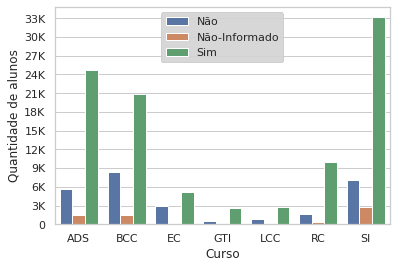

In [145]:
plot3D('nome_curso','trabalha', 'Quantidade de alunos','Curso',lista_cursos, lista_trabalho, 'alunos_trabalho', 0.5,1, 'upper center', list_max=34000, list_step=3000)

In [146]:
colunasDataset.remove('trabalha')

## Alunos por livro

In [147]:
lista_livro = ListColumnValues('livros_ano')
livro_labels = ['Nenhum', '1-2', '3-5', '6-8', 'Mais que 8']

In [148]:
microdados.livros_ano.value_counts()

1/2    48901
3-5    33803
0      30409
8+     10619
6-8     8850
Name: livros_ano, dtype: int64

In [149]:
microdados.livros_ano.value_counts(normalize=True)


1/2    0.368836
3-5    0.254959
0      0.229360
8+     0.080094
6-8    0.066751
Name: livros_ano, dtype: float64

In [150]:
microdados.groupby('ead_presencial').livros_ano.value_counts(normalize=True).unstack()

livros_ano,0,1/2,3-5,6-8,8+
ead_presencial,,,,,
EAD,0.154588,0.367817,0.276265,0.084584,0.116745
Não-Informado,0.498213,0.240009,0.177570,0.042402,0.041807
Presencial,0.188638,0.391629,0.266700,0.069455,0.083578


In [151]:
microdados.groupby('categoria_adm_IES').livros_ano.value_counts(normalize=True).unstack()


livros_ano,0,1/2,3-5,6-8,8+
categoria_adm_IES,,,,,
IES privada,0.230434,0.371119,0.254085,0.065973,0.078388
IES pública,0.226565,0.362896,0.257232,0.068776,0.084531


In [152]:
microdados.groupby('tipo_ensino_medio').livros_ano.value_counts(normalize=True).unstack()


livros_ano,0,1/2,3-5,6-8,8+
tipo_ensino_medio,,,,,
Exterior,0.192171,0.348754,0.238434,0.096085,0.124555
Não-Informado,0.990779,0.005246,0.002226,0.000636,0.001113
Particular,0.205474,0.381200,0.264219,0.066485,0.082622
Pública,0.184613,0.389863,0.269260,0.071687,0.084576


In [153]:
microdados.groupby('escolaridade_pai').livros_ano.value_counts(normalize=True).unstack()


livros_ano,0,1/2,3-5,6-8,8+
escolaridade_pai,,,,,
Ensino Fundamental,0.182879,0.394258,0.271228,0.070439,0.081197
Ensino Médio,0.193315,0.389516,0.266877,0.069364,0.080929
Ensino Superior,0.202104,0.371539,0.262982,0.069690,0.093686
Nenhuma,0.661630,0.160977,0.110707,0.031431,0.035255


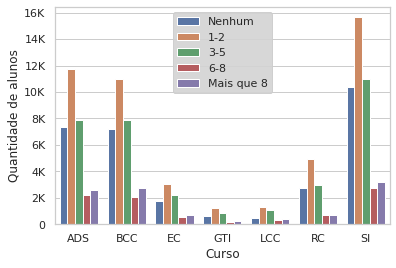

In [154]:
plot3D('nome_curso','livros_ano', 'Quantidade de alunos','Curso',lista_cursos, lista_livro, 'alunos_livros', 0.5,1, 'upper center',labels=livro_labels, list_max=17000, list_step=2000)

In [155]:
colunasDataset.remove('livros_ano')

## Alunos por horas estudo

In [156]:
lista_horas = ['0','<3', '3-8', '8+']
horas_labels = ['Nenhuma','Menos que 3', '3-8', 'Mais que 8']

In [157]:
microdados.horas_estudo.value_counts()

<3     55170
3-8    36151
8+     23695
0      17566
Name: horas_estudo, dtype: int64

In [158]:
microdados.loc[microdados.livros_ano != '0'].horas_estudo.value_counts()

<3     44046
3-8    31102
8+     20672
0       6353
Name: horas_estudo, dtype: int64

In [159]:
microdados.loc[microdados.livros_ano == '0'].horas_estudo.value_counts()


0      11213
<3     11124
3-8     5049
8+      3023
Name: horas_estudo, dtype: int64

In [160]:
microdados.groupby('categoria_adm_IES').horas_estudo.value_counts(normalize=True).unstack()*100


horas_estudo,0,3-8,8+,<3
categoria_adm_IES,,,,
IES privada,14.449654,26.642789,15.389435,43.518122
IES pública,10.126307,28.890398,24.329757,36.653538


In [161]:
microdados.groupby('ead_presencial').horas_estudo.value_counts(normalize=True).unstack()*100


horas_estudo,0,3-8,8+,<3
ead_presencial,,,,
EAD,5.735420,30.124357,24.078045,40.062178
Não-Informado,41.958193,26.286148,5.902740,25.852919
Presencial,8.858839,27.185365,19.428751,44.527045


In [162]:
microdados.groupby('turno').horas_estudo.value_counts(normalize=True).unstack()*100



horas_estudo,0,3-8,8+,<3
turno,,,,
Diurno,11.044826,28.367529,20.316682,40.270963
Integral,8.214026,30.726765,29.883523,31.175686
Noturno,14.468614,26.488757,15.416607,43.626022
Não-Informado,61.666667,20.000000,1.666667,16.666667


In [163]:
microdados.groupby('tipo_ensino_medio').horas_estudo.value_counts(normalize=True).unstack()*100


horas_estudo,0,3-8,8+,<3
tipo_ensino_medio,,,,
Exterior,9.608541,33.451957,28.469751,28.469751
Não-Informado,98.982512,0.317965,0.143084,0.556439
Particular,10.984665,28.178686,18.535863,42.300786
Pública,8.002453,28.802226,18.829231,44.366089


In [164]:
microdados.groupby('escolaridade_pai').horas_estudo.value_counts(normalize=True).unstack()*100


horas_estudo,0,3-8,8+,<3
escolaridade_pai,,,,
Ensino Fundamental,7.583908,29.038247,18.676033,44.701812
Ensino Médio,9.155299,28.517401,18.249388,44.077912
Ensino Superior,11.102985,28.234598,19.364051,41.298367
Nenhuma,61.509047,11.509047,8.711061,18.270845


In [165]:
microdados.groupby('escolaridade_mae').horas_estudo.value_counts(normalize=True).unstack()*100


horas_estudo,0,3-8,8+,<3
escolaridade_mae,,,,
Ensino Fundamental,7.641445,29.109709,18.640531,44.608314
Ensino Médio,9.203729,28.362941,18.331863,44.101466
Ensino Superior,10.377217,28.274851,19.498041,41.849891
Nenhuma,72.675073,8.748030,5.595587,12.981311


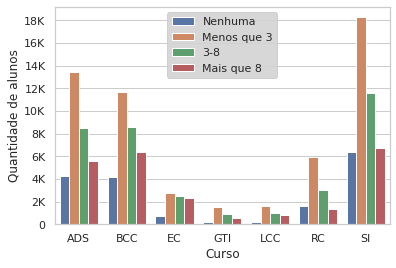

In [166]:
plot3D('nome_curso','horas_estudo', 'Quantidade de alunos','Curso',lista_cursos, lista_horas, 'alunos_horas_estudo', 0.5,1, 'upper center',labels=horas_labels, list_max=19000, list_step=2000)

In [167]:
colunasDataset.remove('horas_estudo')

In [168]:
colunasDataset

['nota_geral',
 'nota_formacao_geral',
 'nota_obj_formacao_geral',
 'nota_dis_formacao_geral',
 'nota_componente_especifico',
 'nota_obj_componente_especifico',
 'nota_dis_componente_especifico',
 'idade_comeco_graduacao',
 'tempo_ocioso',
 'tempo_cursado']

## Alunos por nota geral

In [169]:
# pandas.DataFrame.corr

In [170]:
def normalizeColumn(column):
    microdados['nt_geral_normalize'] = microdados.groupby([column])['nota_geral'].transform(lambda x: (x-x.min())/(x.max()-x.min())) 

In [171]:
# microdados['nt_geral_normalize'] = microdados.groupby(['nome_curso'])['nota_geral'].transform(lambda x: (x-x.min())/(x.max()-x.min())) 
# microdados['nt_geral_normalize'] = microdados['nt_geral_normalize']*100

In [172]:
microdados['nt_geral_norm'] = (microdados['nota_geral'] - microdados['nota_geral'].min())/(microdados['nota_geral'].max() - microdados['nota_geral'].min())

In [173]:
microdados.groupby(['regiao'])['nota_geral'].mean().sort_values(ascending=False)

regiao
NE    41.198231
S     40.992636
SE    39.703980
N     38.537036
CO    37.614992
Name: nota_geral, dtype: float64

In [174]:
normalizeColumn('regiao')

In [175]:
microdados.groupby(['regiao'])['nt_geral_normalize'].mean().sort_values(ascending=False)


regiao
N     0.441432
CO    0.437893
NE    0.428256
S     0.426562
SE    0.417497
Name: nt_geral_normalize, dtype: float64

In [176]:
microdados.groupby(['categoria_adm_IES'])['nota_geral'].mean().sort_values(ascending=False)

categoria_adm_IES
IES pública    45.061831
IES privada    37.959093
Name: nota_geral, dtype: float64

In [177]:
normalizeColumn('categoria_adm_IES')
microdados.groupby(['categoria_adm_IES'])['nt_geral_normalize'].mean().sort_values(ascending=False)

categoria_adm_IES
IES pública    0.468418
IES privada    0.406850
Name: nt_geral_normalize, dtype: float64

In [178]:
microdados.groupby(['turno'])['nota_geral'].mean().sort_values(ascending=False)


turno
Integral         47.033372
Diurno           41.592005
Noturno          38.437234
Não-Informado    35.300000
Name: nota_geral, dtype: float64

In [179]:
microdados.groupby(['ead_presencial'])['nota_geral'].mean().sort_values(ascending=False)


ead_presencial
Presencial       40.474080
EAD              40.022566
Não-Informado    36.805556
Name: nota_geral, dtype: float64

In [180]:
normalizeColumn('ead_presencial')
microdados.groupby(['ead_presencial'])['nt_geral_normalize'].mean().sort_values(ascending=False)


ead_presencial
EAD              0.441750
Presencial       0.420728
Não-Informado    0.419676
Name: nt_geral_normalize, dtype: float64

In [181]:
microdados.groupby(['tipo_ensino_medio'])['nota_geral'].mean().sort_values(ascending=False)


tipo_ensino_medio
Exterior         44.131317
Particular       41.755678
Pública          39.325025
Não-Informado    35.965199
Name: nota_geral, dtype: float64

In [182]:
normalizeColumn('tipo_ensino_medio')

microdados.groupby(['tipo_ensino_medio'])['nt_geral_normalize'].mean().sort_values(ascending=False)


tipo_ensino_medio
Exterior         0.487119
Particular       0.434051
Pública          0.413512
Não-Informado    0.410093
Name: nt_geral_normalize, dtype: float64

In [183]:
microdados.groupby(['tipo_ensino_medio'])['nt_geral_normalize'].describe().sort_values(by='mean',ascending=False)


,count,mean,std,min,25%,50%,75%,max
tipo_ensino_medio,,,,,,,,
Exterior,281.0,0.487119,0.190761,0.0,0.359043,0.492021,0.623670,1.0
Particular,41212.0,0.434051,0.149130,0.0,0.327443,0.426195,0.535603,1.0
Pública,84799.0,0.413512,0.141815,0.0,0.312303,0.403785,0.505783,1.0
Não-Informado,6290.0,0.410093,0.129573,0.0,0.320410,0.401368,0.488027,1.0


In [184]:
microdados.groupby(['range_idade'])['nota_geral'].mean().sort_values(ascending=False)


range_idade
17-24    40.464213
40-49    39.540771
30-39    39.202536
25-29    39.169161
50+      38.309895
Name: nota_geral, dtype: float64

In [185]:
normalizeColumn('range_idade')

microdados.groupby(['range_idade'])['nt_geral_normalize'].mean().sort_values(ascending=False)

range_idade
40-49    0.454492
50+      0.435340
30-39    0.432699
25-29    0.425289
17-24    0.420626
Name: nt_geral_normalize, dtype: float64

In [186]:
microdados.groupby(['sexo'])['nota_geral'].mean().sort_values(ascending=False)


sexo
M    40.239287
F    38.262750
Name: nota_geral, dtype: float64

In [187]:
microdados.groupby(['cor_raca'])['nota_geral'].mean().sort_values(ascending=False)


cor_raca
Amarela     40.657230
Branca      40.485027
Parda       39.648383
Preta       38.229243
Não Inf.    37.567053
Indígena    37.369619
Name: nota_geral, dtype: float64

In [188]:
microdados.groupby(['escolaridade_pai'])['nota_geral'].mean().sort_values(ascending=False)


escolaridade_pai
Ensino Superior       42.256769
Ensino Médio          40.187636
Ensino Fundamental    38.950182
Nenhuma               36.948564
Name: nota_geral, dtype: float64

In [189]:
microdados.groupby(['escolaridade_mae'])['nota_geral'].mean().sort_values(ascending=False)


escolaridade_mae
Ensino Superior       41.875767
Ensino Médio          40.218233
Ensino Fundamental    38.832467
Nenhuma               36.351745
Name: nota_geral, dtype: float64

In [190]:
microdados.groupby(['renda_familiar'])['nota_geral'].mean().sort_values(ascending=False)


renda_familiar
10-30      42.028007
30+        41.497896
3-10       40.483863
<3         38.593938
Nenhuma    36.040586
Name: nota_geral, dtype: float64

In [191]:
microdados.groupby(['cotas'])['nota_geral'].mean().sort_values(ascending=False)


cotas
2+                     43.706811
EM público             43.655051
Não                    39.804137
Étnico Racial          39.304444
Renda                  37.210339
Outro                  36.523625
Renda ou EM público    35.549500
Name: nota_geral, dtype: float64

In [192]:
microdados.groupby(['bolsa_academica'])['nota_geral'].mean().sort_values(ascending=False)


bolsa_academica
PET          53.235753
IC           51.304322
Monitoria    49.496846
Extensão     47.296190
Outro        43.544299
Nenhum       38.824575
Name: nota_geral, dtype: float64

In [193]:
microdados.groupby(['trabalha'])['nota_geral'].mean().sort_values(ascending=False)


trabalha
Não              42.233477
Sim              39.555678
Não-Informado    36.001535
Name: nota_geral, dtype: float64

In [194]:
microdados.groupby(['livros_ano'])['nota_geral'].mean().sort_values(ascending=False)


livros_ano
8+     41.963707
6-8    40.827254
3-5    40.573301
1/2    39.687131
0      38.640084
Name: nota_geral, dtype: float64

In [195]:
microdados.groupby(['horas_estudo'])['nota_geral'].mean().sort_values(ascending=False)


horas_estudo
8+     43.611973
3-8    41.156162
<3     38.500165
0      36.940886
Name: nota_geral, dtype: float64

In [196]:
microdados.groupby(['nome_curso','ano'])['nota_geral'].describe().unstack().reset_index()

nome_curso   count                                  mean             \
ano               2008     2011     2014     2017       2008       2011   
0          ADS  3852.0   7265.0  11110.0   9636.0  41.105244  40.243565   
1          BCC  4447.0   9670.0   8263.0   8408.0  35.647942  32.814922   
2           EC   387.0   1929.0   2543.0   3415.0  40.385013  36.844894   
3          GTI     NaN      NaN      NaN   3203.0        NaN        NaN   
4          LCC     NaN    694.0   1778.0   1080.0        NaN  32.562248   
5           RC  2179.0   3415.0   3851.0   2480.0  37.567875  37.313441   
6           SI  7601.0  10246.0  13238.0  11892.0  34.903065  30.135809   

                                 std  ...   50%           75%              \
ano       2014       2017       2008  ...  2014   2017   2008  2011  2014   
0    40.441179  40.236249  12.111087  ...  39.7  39.60  49.10  50.6  49.2   
1    44.426540  43.324619  12.394615  ...  43.7  42.30  42.50  40.5  53.5   
2    46.017263  45.425124  13.373903  ...  46.5  44.40  47.45  44.0  56.3   
3          NaN  45.517921        NaN  ...   NaN  45.60    NaN   NaN   NaN   
4    49.523510  40.776852        NaN  ...  50.4  40.85    NaN  39.1  60.3   
5    42.443599  33.744919  12.845207  ...  41.7  33.20  45.55  45.0  51.1   
6    43.607962  44.746678   9.420041  ...  43.3  44.60  41.10  36.6  52.7   

              max                    
ano    2017  2008  2011  2014  2017  
0    49.000  87.7  88.0  91.5  90.6  
1    52.500  86.5  82.3  96.1  95.1  
2    54.650  82.4  86.7  93.8  96.2  
3    54.700   NaN   NaN   NaN  87.8  
4    50.225   NaN  67.5  87.3  79.6  
5    41.300  85.2  90.5  92.1  76.4  
6    53.800  72.0  74.9  88.4  87.3  

[7 rows x 33 columns]

In [197]:
microdados['nota_geral'].describe()


count    132582.000000
mean         39.931362
std          13.744919
min           0.000000
25%          30.200000
50%          39.000000
75%          49.000000
max          96.200000
Name: nota_geral, dtype: float64

In [198]:
microdados['nota_geral'].mode()

0    39.4
dtype: float64

In [199]:
microdados['nome_curso'].loc[microdados.nota_geral > 39.93].value_counts().sum()

62631

In [200]:
microdados['nome_curso'].loc[microdados.nota_geral < 39.93].value_counts().sum()


69951

In [201]:
microdados.groupby(['nome_curso'])['nota_geral'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_curso,,,,,,,,
ADS,31863.0,40.414427,13.527699,0.0,30.9,39.6,49.300,91.5
BCC,30788.0,39.210621,14.167085,0.0,29.1,38.0,48.400,96.1
EC,8274.0,43.370981,14.595066,0.0,33.3,42.7,52.800,96.2
GTI,3203.0,45.517921,13.398228,0.0,36.3,45.6,54.700,87.8
LCC,3552.0,43.550113,15.105547,0.0,32.0,43.2,54.425,87.3
RC,11925.0,38.274507,12.965807,0.0,29.1,37.3,46.500,92.1
SI,42977.0,39.171636,13.263608,0.0,29.7,38.2,48.000,88.4


In [202]:
microdados.groupby(['nome_curso','ano'])['nota_geral'].mean().unstack().reset_index()


ano,nome_curso,2008,2011,2014,2017
0,ADS,41.105244,40.243565,40.441179,40.236249
1,BCC,35.647942,32.814922,44.426540,43.324619
2,EC,40.385013,36.844894,46.017263,45.425124
3,GTI,NaN,NaN,NaN,45.517921
4,LCC,NaN,32.562248,49.523510,40.776852
5,RC,37.567875,37.313441,42.443599,33.744919
6,SI,34.903065,30.135809,43.607962,44.746678


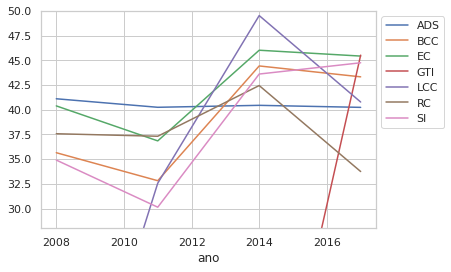

In [203]:
copia = microdados.copy()
# copia.set_index('ano', inplace=True)
# copia.groupby(['nome_curso','ano'])['nota_geral'].mean().unstack().plot(sharex=True)
# copia.groupby('nome_curso')['nota_geral'].mean()
x = copia.groupby(['ano','nome_curso'])['nota_geral'].mean().unstack().fillna(0).plot()
x.set_ylim(28,50)
x.legend(labels=lista_cursos, bbox_to_anchor=(1,1))

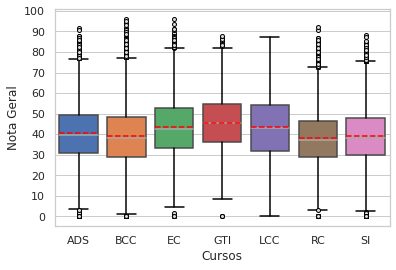

In [204]:
boxplotNota('nome_curso', 'nota_geral', 'Nota Geral', 'Cursos', 'alunos_nota_geral', lista_cursos, 101, 10)

já não se trata mais de numeros absolutos, então a comparação é tipo "tal curso tem média maior, mediana maior..." sem falar valores

In [205]:
normalizeColumn('nome_curso')


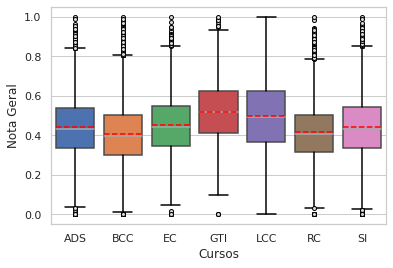

In [206]:
boxplotNota('nome_curso', 'nt_geral_normalize', 'Nota Geral', 'Cursos', 'alunos_nota_geral_norm', lista_cursos)

In [207]:
microdados['nt_g_n'] = zscore(microdados['nota_geral'])

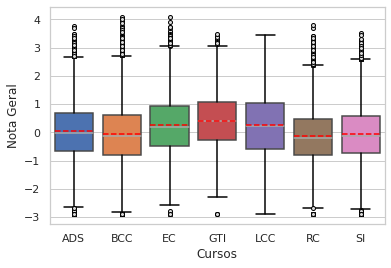

In [208]:
boxplotNota('nome_curso', 'nt_g_n', 'Nota Geral', 'Cursos', 'alunos_nota_geral_norm_z', lista_cursos)


## Alunos nota formacao geral

In [209]:
microdados['nota_formacao_geral'].describe()


count    132582.000000
mean         52.163797
std          18.010767
min           0.000000
25%          40.000000
50%          53.100000
75%          65.100000
max          99.200000
Name: nota_formacao_geral, dtype: float64

In [210]:
microdados.groupby(['nome_curso'])['nota_formacao_geral'].describe()


,count,mean,std,min,25%,50%,75%,max
nome_curso,,,,,,,,
ADS,31863.0,51.334309,17.908993,0.0,38.8,52.5,64.1,98.6
BCC,30788.0,54.170411,18.335410,0.0,42.5,55.8,67.5,99.2
EC,8274.0,58.253783,17.738413,0.0,47.0,59.8,71.2,98.8
GTI,3203.0,47.105901,16.645779,0.0,36.1,47.5,58.7,96.2
LCC,3552.0,52.514668,17.326345,0.0,40.7,53.2,65.1,98.6
RC,11925.0,48.251086,17.873265,0.0,36.9,49.0,61.3,98.2
SI,42977.0,51.602450,17.619353,0.0,39.8,52.5,64.1,99.0


In [211]:
microdados.groupby(['nome_curso','ano'])['nota_formacao_geral'].mean().unstack().reset_index()


ano,nome_curso,2008,2011,2014,2017
0,ADS,50.007788,49.517275,55.731710,48.164467
1,BCC,52.820778,49.987280,59.748626,54.213214
2,EC,54.891473,52.968896,62.408769,58.526003
3,GTI,NaN,NaN,NaN,47.105901
4,LCC,NaN,54.051873,53.654893,49.649722
5,RC,46.762047,47.534993,52.560322,43.853992
6,SI,48.391988,48.930705,56.596918,50.396653


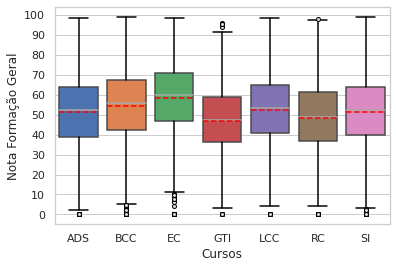

In [212]:
boxplotNota('nome_curso', 'nota_formacao_geral', 'Nota Formação Geral', 'Cursos', 'alunos_nota_formacao_geral', lista_cursos, 101, 10)

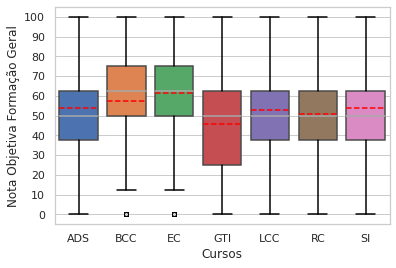

In [213]:
boxplotNota('nome_curso', 'nota_obj_formacao_geral', 'Nota Objetiva Formação Geral', 'Cursos', 'alunos_nota_obj_formacao_geral', lista_cursos, 101, 10)

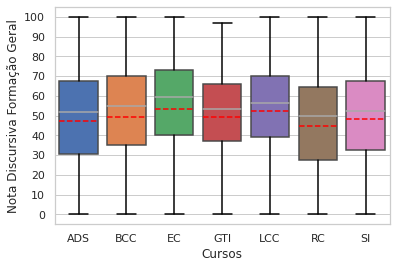

In [214]:
boxplotNota('nome_curso', 'nota_dis_formacao_geral', 'Nota Discursiva Formação Geral', 'Cursos', 'alunos_nota_dis_formacao_geral', lista_cursos, 101, 10)

## Alunos nota compenente especifico

In [215]:
microdados['nota_componente_especifico'].describe()


count    132582.000000
mean         35.837134
std          15.406493
min           0.000000
25%          24.300000
50%          34.300000
75%          46.000000
max          99.300000
Name: nota_componente_especifico, dtype: float64

In [216]:
microdados.groupby(['nome_curso'])['nota_componente_especifico'].describe()


,count,mean,std,min,25%,50%,75%,max
nome_curso,,,,,,,,
ADS,31863.0,36.757499,15.203725,0.0,25.5,35.5,46.80,94.7
BCC,30788.0,34.207431,15.747106,0.0,22.6,32.4,44.50,99.3
EC,8274.0,38.393739,16.584064,0.0,27.6,37.7,48.80,96.3
GTI,3203.0,44.972026,14.735626,0.0,34.6,45.2,54.85,93.4
LCC,3552.0,40.544623,17.163281,0.0,27.3,40.3,53.30,89.5
RC,11925.0,34.932361,14.330400,0.0,25.0,33.8,43.70,96.5
SI,42977.0,35.011243,14.834063,0.0,23.6,33.3,44.70,90.4


In [217]:
microdados.groupby(['nome_curso','ano'])['nota_componente_especifico'].mean().unstack().reset_index()


ano,nome_curso,2008,2011,2014,2017
0,ADS,38.120976,37.134935,35.327570,37.576546
1,BCC,29.906341,27.074747,39.302348,39.678497
2,EC,35.531008,31.454588,40.537239,41.041640
3,GTI,NaN,NaN,NaN,44.972026
4,LCC,NaN,25.380259,48.129190,37.802685
5,RC,34.486278,33.889985,39.054505,30.358710
6,SI,30.389515,23.853806,39.261641,42.846939


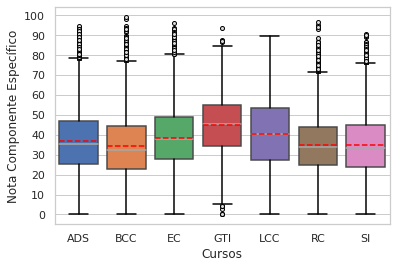

In [218]:
boxplotNota('nome_curso', 'nota_componente_especifico', 'Nota Componente Específico', 'Cursos', 'alunos_nota_componente_espc', lista_cursos, 101, 10)

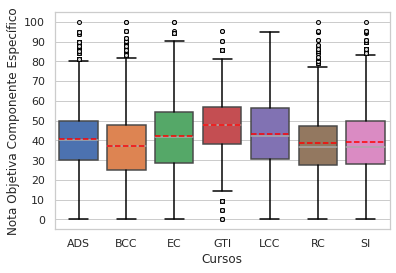

In [219]:
boxplotNota('nome_curso', 'nota_obj_componente_especifico', 'Nota Objetiva Componente Específico', 'Cursos', 'alunos_nota_obj_componente_espc', lista_cursos, 101, 10)

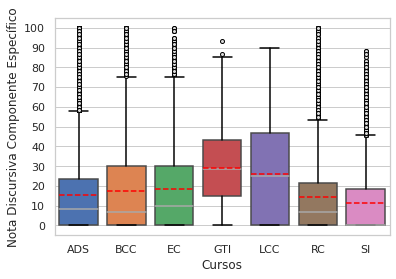

In [220]:
boxplotNota('nome_curso', 'nota_dis_componente_especifico', 'Nota Discursiva Componente Específico', 'Cursos', 'alunos_nota_dis_componente_espc', lista_cursos, 101, 10)